In [1]:
!pip install pandas
!pip install numpy

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 8.3 MB/s eta 0:00:02
   - -------------------------------------- 0.3/11.5 MB 5.2 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.5 MB 5.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.5 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.5 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.5 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/11.5 MB 4.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.5 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.5 MB 4.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.5 MB 4.6 MB/s eta 0:00:03
   -----

In [4]:
!pip install matplotlib
!pip install seaborn

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.6 kB 960.0 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.6 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 4.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.6 MB 5.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.6 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.6 MB 6.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.6 MB 6.7 MB/s eta 0:00:01
   ---------- ----------------------------- 1.9/7.6 MB 7.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.6 MB 7.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.7/7.6 MB 7.5 MB/s eta 0:00:01
   -------

In [5]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("penguins_size.csv")

In [7]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
data.shape
#the dataset has 344 rows of data and 7 columns(features)

(344, 7)

In [11]:
data.info()
#gives the info about the data types and number of non-zero values, and we have some missing values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
#checking the missing values.
missing_data = data.isnull().sum().to_frame("missing values")
missing_data
# we will get the number of missing values in each column.

,missing values
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [15]:
!pip install missingno

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 165.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 196.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 219.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 219.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 178.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.8 MB 2.0 MB/s eta 0:00:23
   ---------------------------------------- 0.2/45.8 MB 2.6 MB/s eta 0:00:18
   ---------------------------------------- 0.3/45.8 MB 2.5 MB/s eta 0:00:18
   ---------------------------------------- 0.5/45.8 MB 2.7 MB/s eta 0:00:17
   -

In [18]:
#we could visulaise the missing values in the data using mnso
import missingno as mnso

<Axes: >

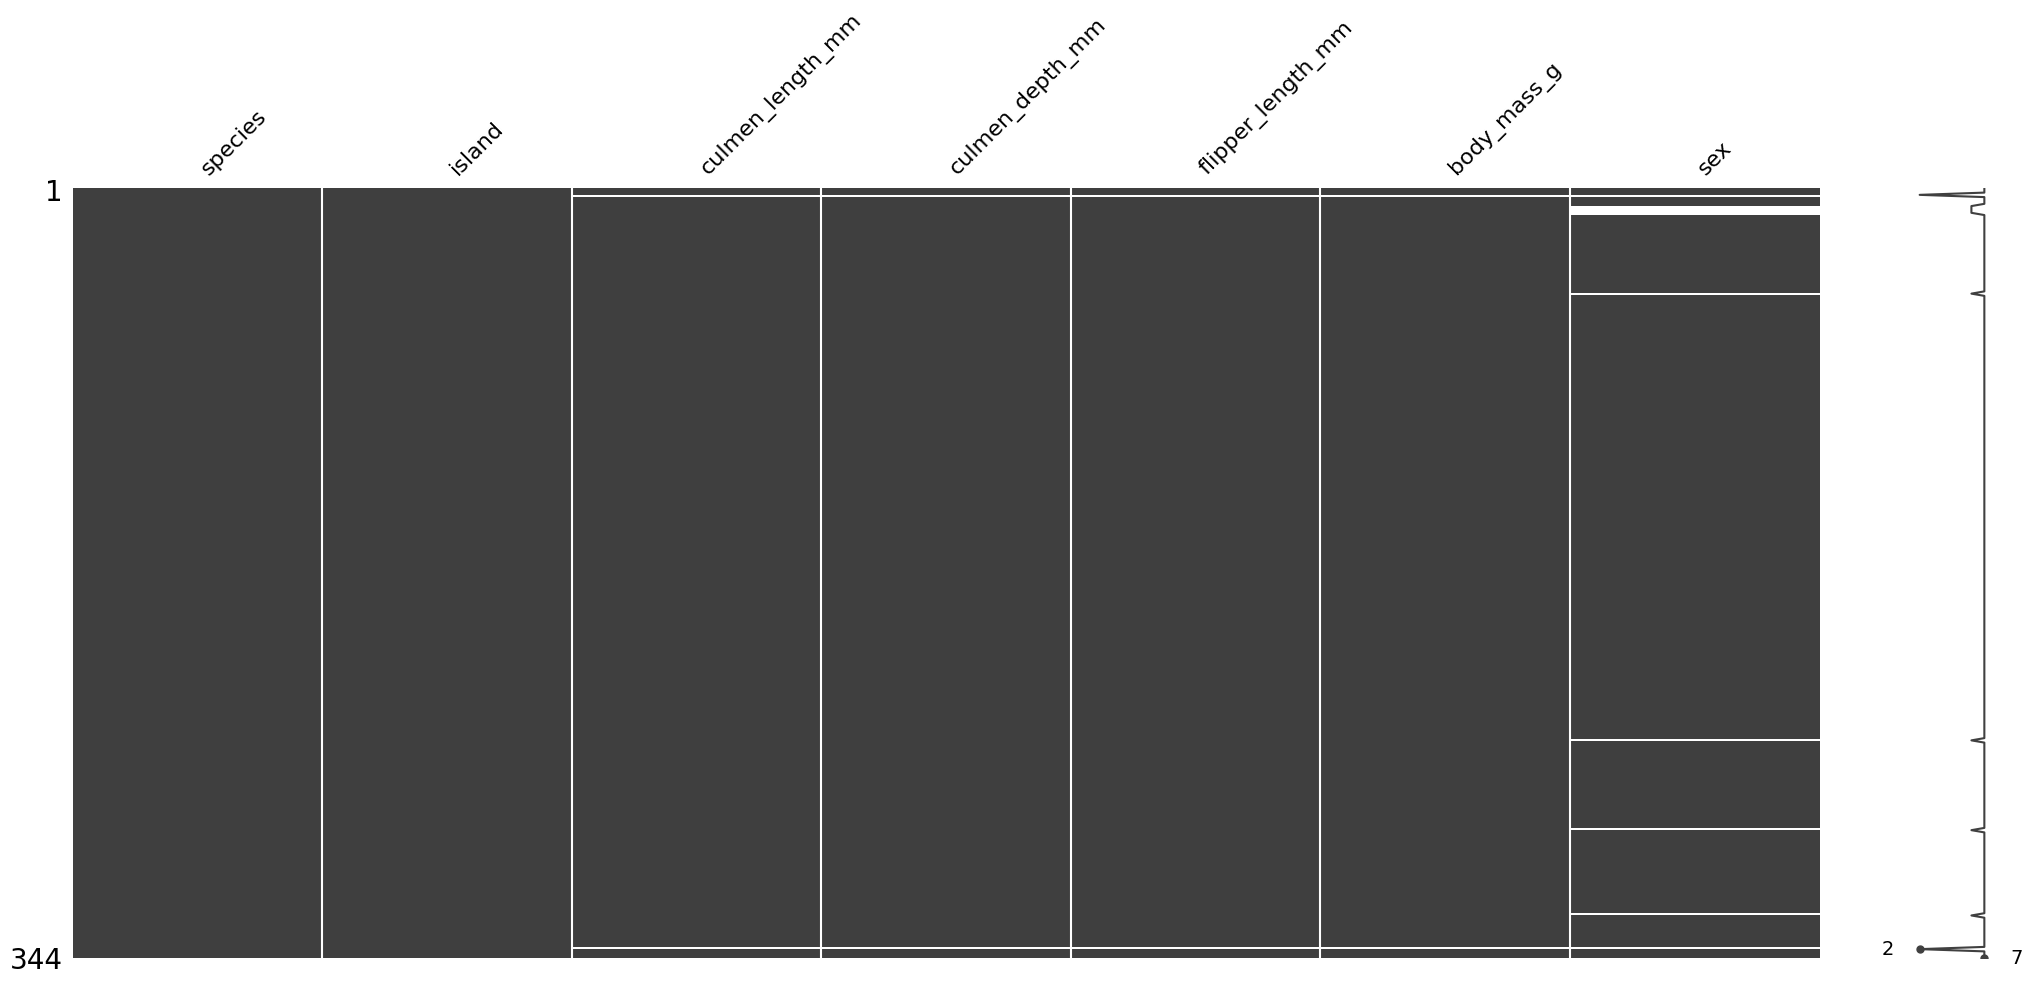

In [20]:
mnso.matrix(data)
#the gaps represent the missing values , which indiciates we have more missing values in last column.

In [22]:
# we could fill the missing values according the mean,median values or the number of missing values are low, we can remove those rows.

data.dropna(inplace=True)
print("Is there any Missing Values:",data.isnull().sum())

Is there any Missing Values: species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [25]:
# once we check for null values, next step would be checking for duplicates.
print("is there any duplicates:",data.duplicated().sum())
#we dont have any.

is there any duplicates: 0


In [26]:
#let's get the statistics of the data.
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


from the above data , we can observe lot of things like min and max flipper and culmen length of the different types of penguins

In [27]:
data.describe(include='object')

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


the above table shows us we have 3 ubique speices and 3 types of islands , and we can also observe wew have 3 unique values for sex which we need to check further.

In [30]:
data['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

The third unique value is "." which needs to be removed

In [31]:
data.drop(data[data['sex']=='.'].index, inplace=True)

In [32]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

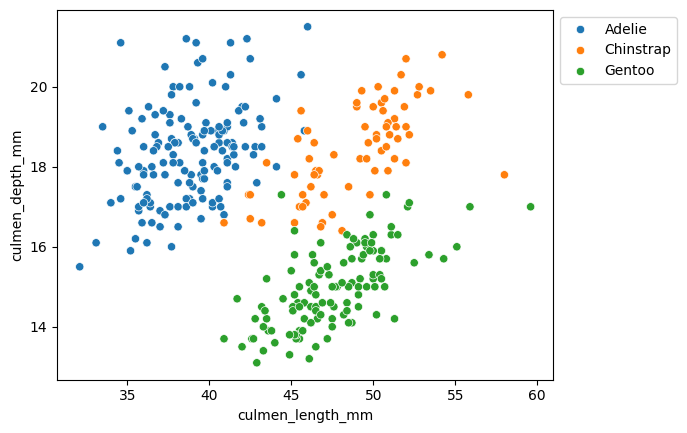

In [34]:
#Relation between features
#relation between culmen length and culmen depth of the various species
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', data=data, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()


From the above plot we can observe that Adelie has more culmen depth than culmen kenth and vice versa for Gentoo , and the chinstrap lies in between Adelie and Gentoo

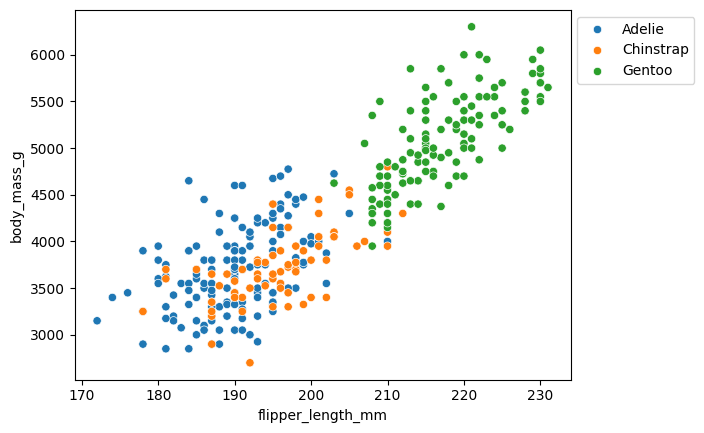

In [36]:
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',hue='species',data=data)
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot we can measure there is not much of a relation between flapper length and weight of the penguin, even though 
we can gentoo penguins have lengthy flappers than Adelie and chinstrap.

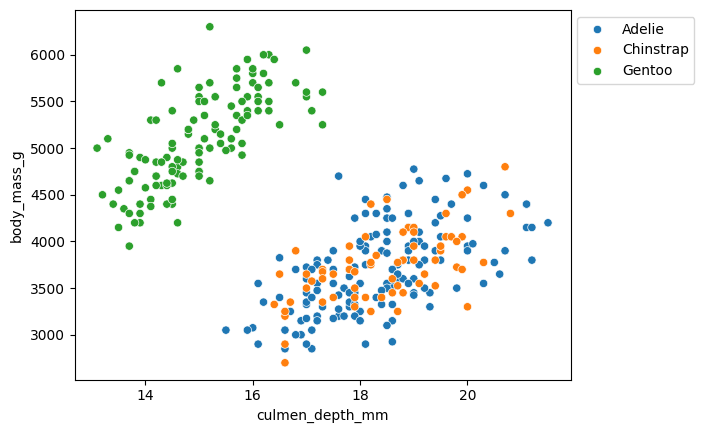

In [37]:
sns.scatterplot(x='culmen_depth_mm',y='body_mass_g',hue='species',data=data)
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot we can observe Gentoo has least culmen depth but higher body mass then other two species

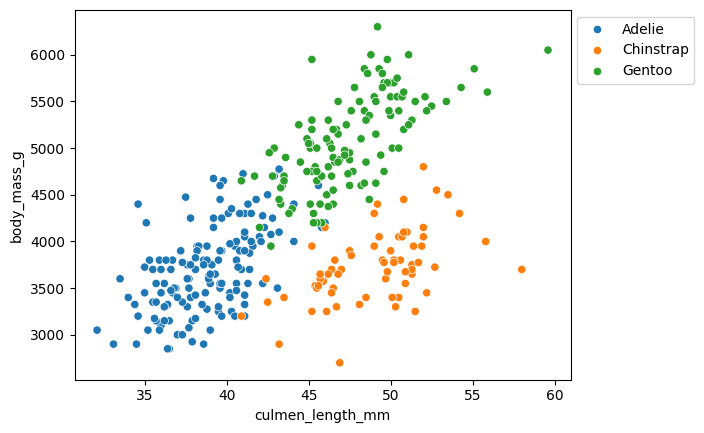

In [39]:
sns.scatterplot(x='culmen_length_mm',y='body_mass_g',hue='species',data=data)
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()
#adelie has low culmen length and body mass than Chinstrap and Gentoo

In [42]:
#Let's plot a histogram to see the distribution of the data.
# Plot a histogram
def histplot(column):
    plt.figure(figsize=(10,4))
    sns.histplot(x=column, data=data, kde=True, hue='species', palette='pastel')
    # find skewness of column
    skew = data[column].skew()
    plt.title(f"{column.title()} Skewness is: {round(skew,2)}",fontweight="black",size=15)
    plt.tight_layout()
    plt.show()

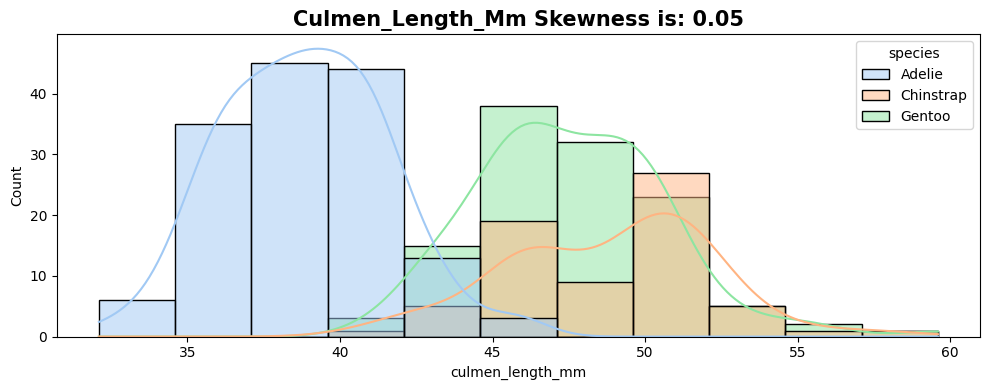

In [43]:
histplot('culmen_length_mm')

In [ ]:
Observations:

Adelie penguins are between 35 to 43 culmen_length

Gentoo penguins are between 43 to 51 culmen_length

Chinstrap penguins are between 51 to 55 culmen_length

 skewness for feature culmen_length_mm is right, while the intensity of skewness is mild

We can find the similar observations from the scatter plot we have above.



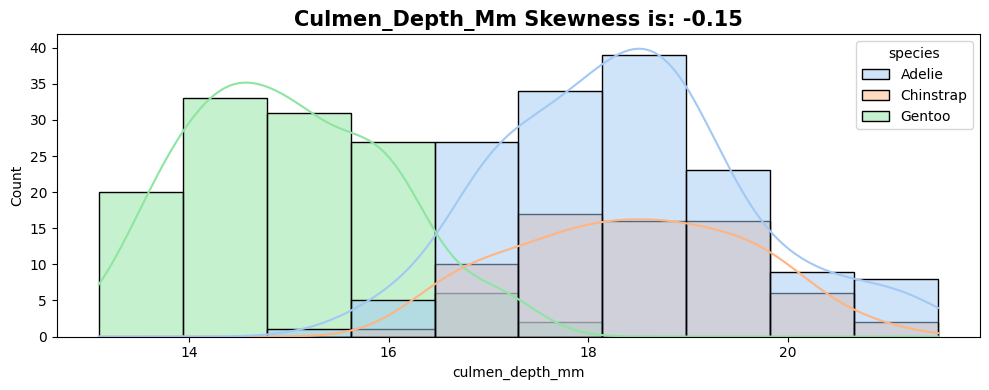

In [44]:
histplot('culmen_depth_mm')

Skewness for feature culmen_depth_mm is left, while the intensity of skewness is mild



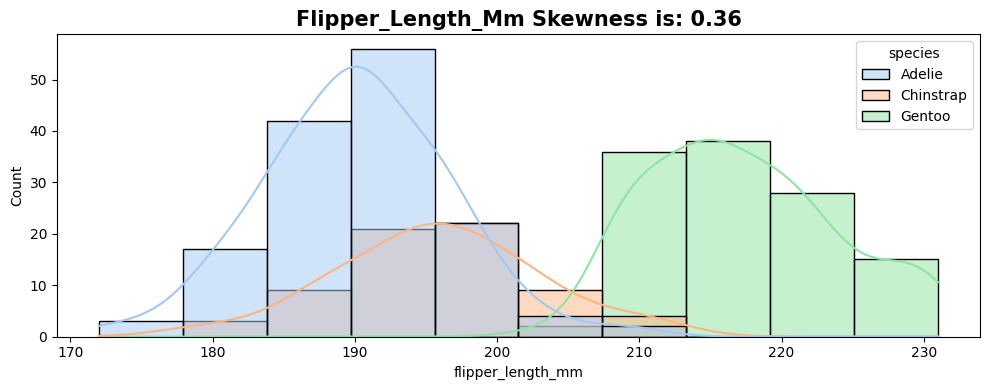

In [46]:
histplot('flipper_length_mm')

In [ ]:
#Bivariate Analysis

